# Stroke Prediction

In [2]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Научная графика
import sklearn                  # Алгоритмы машинного обучения
import warnings
warnings.filterwarnings("ignore")

# Загрузим данные 

In [3]:
data = pd.read_csv('./healthcare-dataset-stroke-data.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Описание данных

По данным Всемирной организации здравоохранения (ВОЗ), инсульт является второй по величине причиной смертности в мире, на него приходится около 11 % от общего числа смертей. 
Этот набор данных используется для прогнозирования вероятности инсульта у пациента на основе таких входных параметров, как пол, возраст, различные заболевания и курение. Каждая строка в данных предоставляет релевантную информацию о пациенте.

`id` идентификатор (int64)

`gender` пол ("Male", "Female" или "Other") (object)

`age` возраст пациента (float64)

`hypertension` наличие гипертонии у пациента (0 - нет, 1 - есть) (int64)

`heart_disease` наличие сердечных заболеваний (0 - нет, 1 - есть) (int64)

`ever_married` женат/замужем ("No" или "Yes") (object)

`work_type` род занятий ("children", "Govt_jov", "Never_worked", "Private" или "Self-employed") (object)

`Residence_type` место проживания ("Rural" или "Urban") (object)

`avg_glucose_level` средний уровень глюкозы в крови (float64)

`bmi` индекс массы тела (float64)

`smoking_status` курение ("formerly smoked", "never smoked", "smokes" или "Unknown") (object)

`stroke` инсульт (0 не было инстульта, 1 был инсульт) (int64)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Заменим тип данных столбцов `gender`, `work_type` и `smoking_status` на тип, предназначенный для хранения категориальных данных

In [6]:
data['gender'] = data['gender'].astype('category')
data['work_type'] = data['work_type'].astype('category')
data['smoking_status'] = data['smoking_status'].astype('category')

In [7]:
data.describe(include=['category'])

,gender,work_type,smoking_status
count,5110,5110,5110
unique,3,5,4
top,Female,Private,never smoked
freq,2994,2925,1892


Заменим строковые значения на числовые:

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# transforms the string labels to integer representation
data['gender'] = label_encoder.fit_transform(data['gender'])
data['ever_married'] = label_encoder.fit_transform(data['ever_married'])
data['Residence_type'] = label_encoder.fit_transform(data['Residence_type'])
data['work_type'] = label_encoder.fit_transform(data['work_type'])
data['smoking_status'] = label_encoder.fit_transform(data['smoking_status'])

In [9]:
data.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000,5110.000000
mean,36517.829354,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,21161.721625,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.854067,1.071534,0.215320
min,67.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,17741.250000,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.500000,0.000000,0.000000
50%,36932.000000,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.100000,2.000000,0.000000
75%,54682.000000,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,33.100000,2.000000,0.000000
max,72940.000000,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


# Ищем пустые значения

In [10]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Есть 201 пустое значение в столбце `bmi`, заменим их на значение медианы.

In [11]:
data['bmi'].median(axis = 0)

28.1

In [12]:
data['bmi'] = data['bmi'].fillna(data['bmi'].median(axis = 0), axis=0)

In [13]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Избавимся от выбросов.

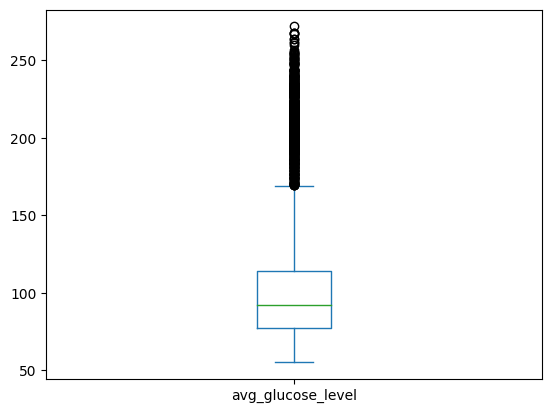

In [14]:
data['avg_glucose_level'].plot(kind='box')
pass

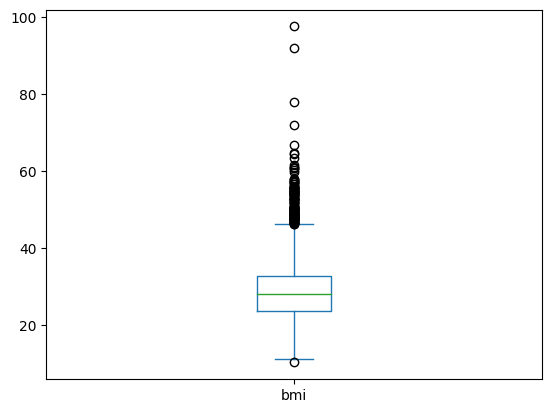

In [15]:
data['bmi'].plot(kind='box')
pass

In [16]:
data['avg_glucose_level'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     55.78545
0.010     56.33090
0.050     60.71350
0.100     65.78900
0.500     91.88500
0.900    192.18100
0.950    216.29450
0.990    240.70820
0.995    249.29910
Name: avg_glucose_level, dtype: float64

In [228]:
data['bmi'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    15.103
0.010    15.800
0.050    18.000
0.100    20.000
0.500    28.100
0.900    38.500
0.950    42.200
0.990    50.200
0.995    53.385
Name: bmi, dtype: float64

In [18]:
rows_to_drop = data[
    (data['avg_glucose_level'] < data['avg_glucose_level'].quantile(0.005)) | (data['avg_glucose_level'] > data['avg_glucose_level'].quantile(0.995)) | 
    (data['bmi']  < data['bmi'].quantile(0.005)) | (data['bmi']  > data['bmi'].quantile(0.995))].index
data_new = data.drop(rows_to_drop)
data_new.shape

(5007, 12)

In [226]:
data['avg_glucose_level'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     56.3303
0.010     56.9406
0.050     61.2900
0.100     66.0760
0.500     91.8500
0.900    189.5220
0.950    213.5070
0.990    235.8368
0.995    240.7094
Name: avg_glucose_level, dtype: float64

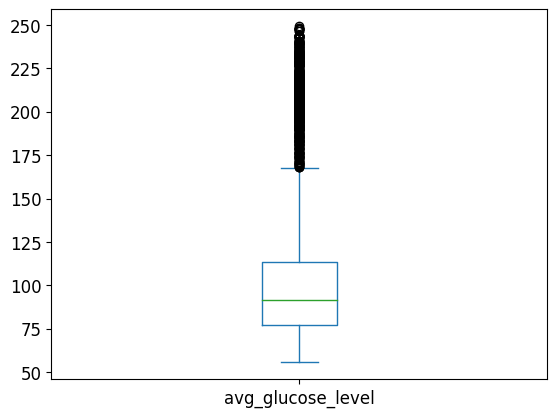

In [231]:
data['avg_glucose_level'].plot(kind='box')
pass

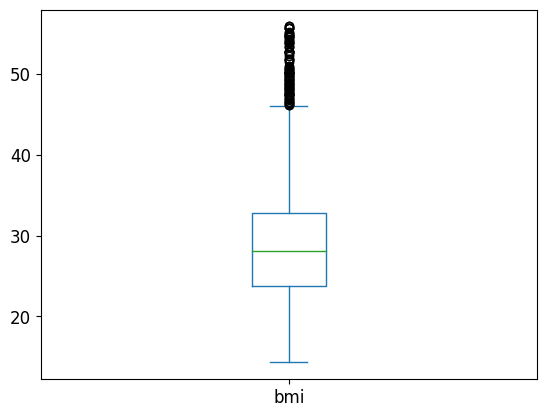

In [230]:
data['bmi'].plot(kind='box')
pass

In [19]:
(data.shape[0] - data_new.shape[0]) / data.shape[0] * 100 # процентов выбросов

2.015655577299413

In [20]:
data = data_new

# Обучающая и тестовая выборки

Для задачи классификации будем использовать все входные признаки, кроме `id`

In [21]:
X = data.drop(['stroke', 'id'], axis = 1)
y = data['stroke']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

# Визуализируйте данные из обучающей выборки. 

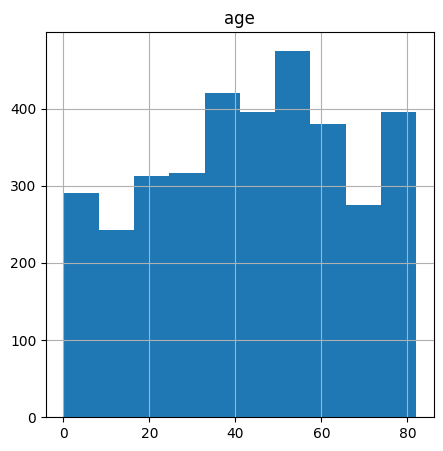

In [23]:
X_train.hist('age', figsize = (5, 5))
pass

array([[<AxesSubplot: title={'center': 'avg_glucose_level'}>]],
      dtype=object)

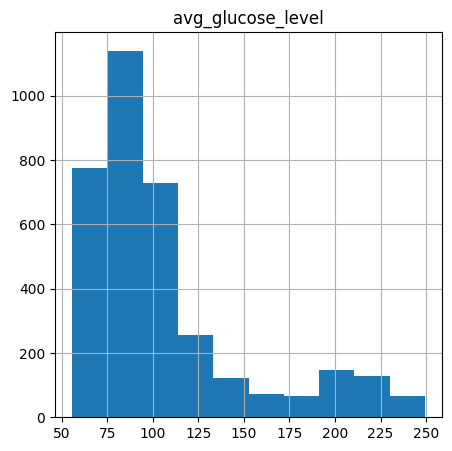

In [24]:
X_train.hist('avg_glucose_level', figsize = (5, 5))

array([[<AxesSubplot: title={'center': 'bmi'}>]], dtype=object)

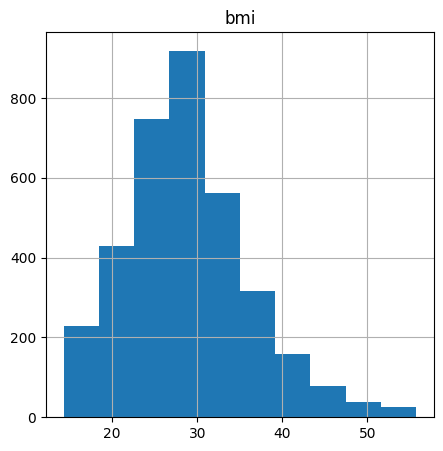

In [25]:
X_train.hist('bmi', figsize = (5, 5))

<AxesSubplot: xlabel='heart_disease', ylabel='count'>

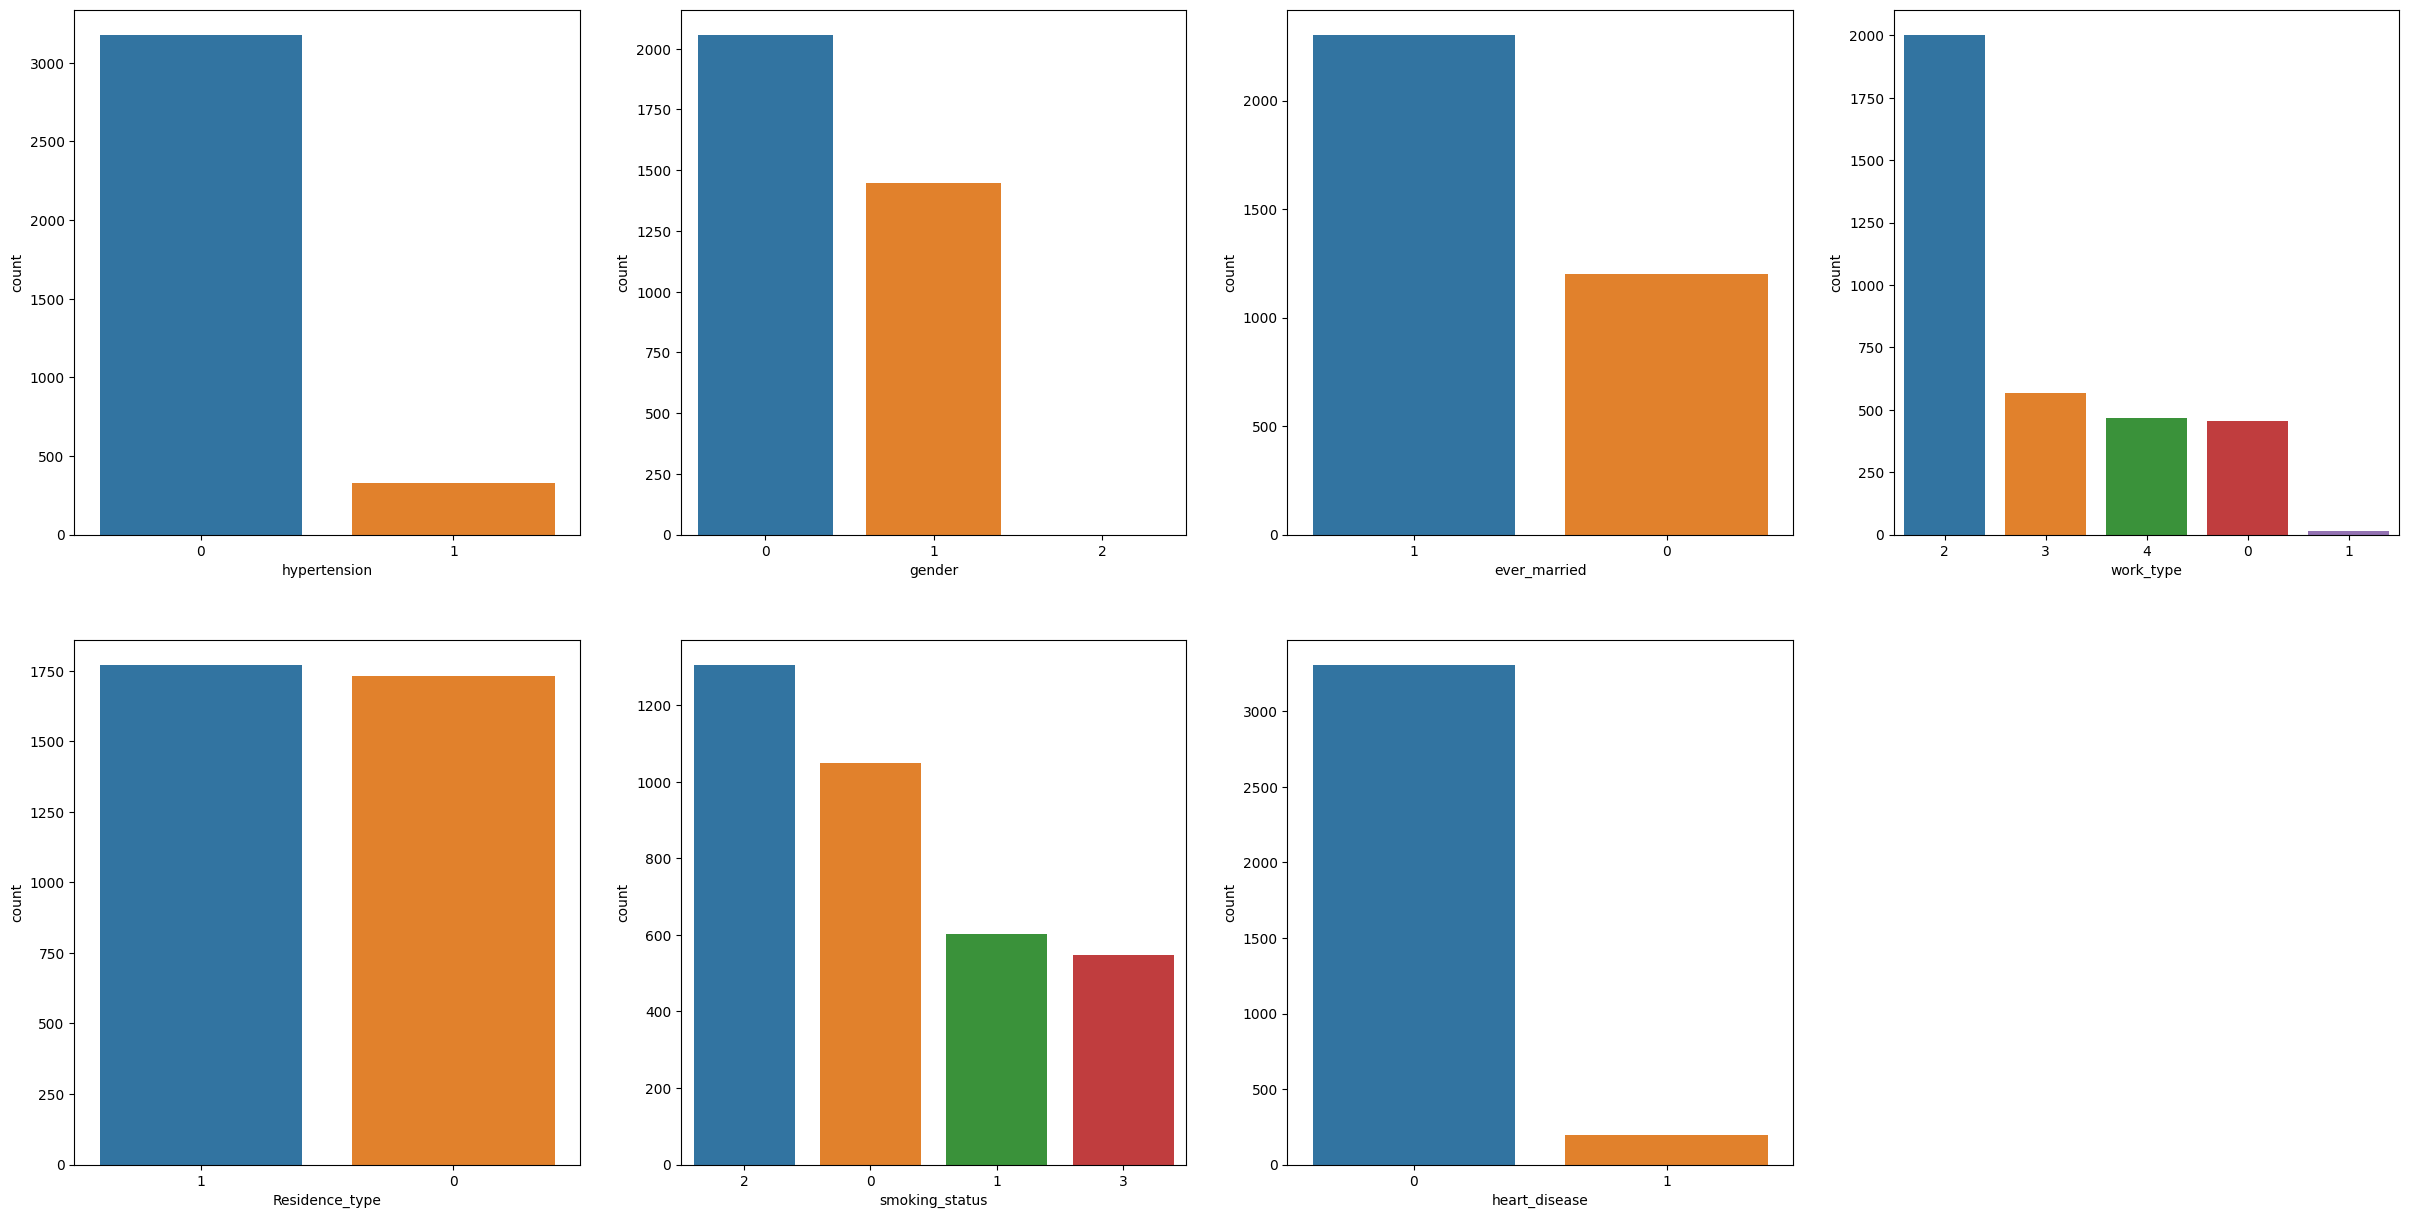

In [26]:
fig, ax = plt.subplots(2,4)
fig.set_size_inches(30, 15)
fig.delaxes(ax[1][3])
sns.countplot(x="hypertension", ax=ax[0,0], data=X_train, order=data['hypertension'].value_counts().index)
sns.countplot(x="gender", data=X_train, ax=ax[0,1], order=data['gender'].value_counts().index)
sns.countplot(x="ever_married", data=X_train, ax=ax[0,2], order=data['ever_married'].value_counts().index)
sns.countplot(x="work_type", data=X_train, ax=ax[0,3], order=data['work_type'].value_counts().index)
sns.countplot(x="Residence_type", data=X_train, ax=ax[1,0], order=data['Residence_type'].value_counts().index)
sns.countplot(x="smoking_status", data=X_train, ax=ax[1,1], order=data['smoking_status'].value_counts().index)
sns.countplot(x="heart_disease", data=X_train, ax=ax[1,2], order=data['heart_disease'].value_counts().index)

<AxesSubplot: >

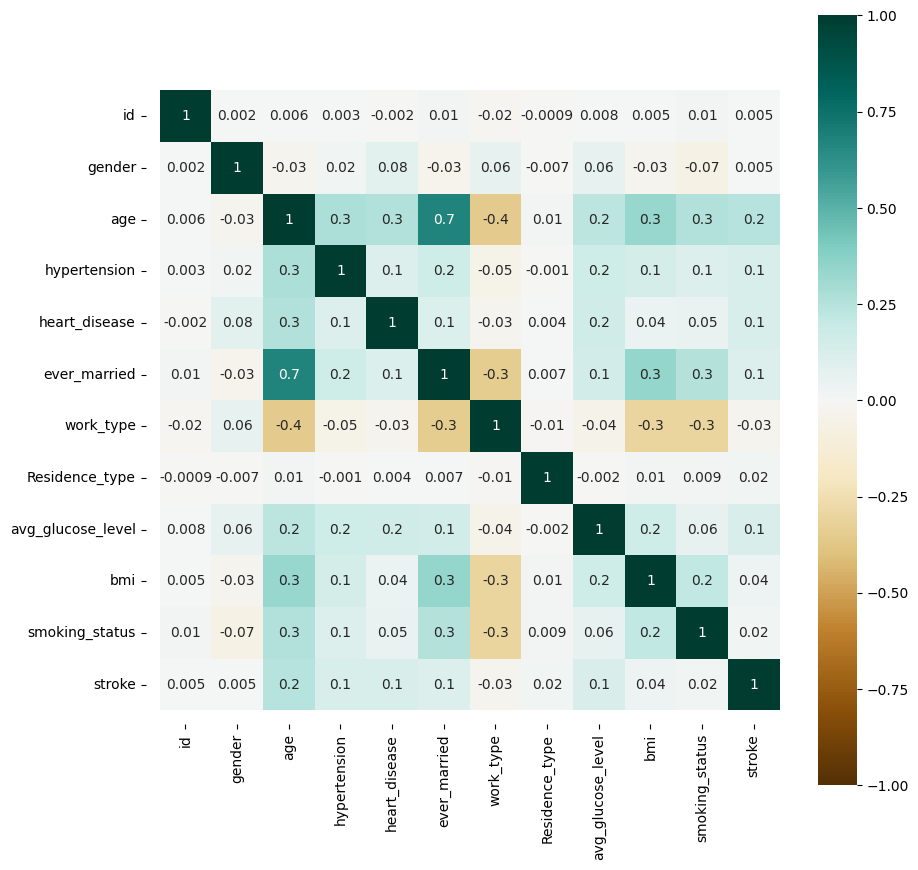

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
sns.despine(offset=10, trim=False)

sns.heatmap(data.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, cmap='BrBG', center= 0, square=True, ax = ax)

Проанализировав данные, можно сделать следующий вывод: на частоту сердечных заболеваний, в бОльшей степени, влияют возраст и средний уровень глюкозы. В гораздо меньшей степени влияют курение, работа, индекс массы тела, место жительства и пол.


Можно заметить и некоторые другие корреляции: например, `age` и `ever_married` (корреляция довольно сильная, действительно, с возрастом люди часто женятся)

# Классификация

## kNN

In [213]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
model = KNeighborsClassifier(n_neighbors=3)

In [214]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [215]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)
# test_pred = model.predict(X_test)
print("Test:", " Accuracy =", model.score(X_test, y_test) *100)

Test:  Accuracy = 93.74584165003327


In [216]:
print("Train:\n", confusion_matrix(y_train, y_train_predict), end="\n\n")
print("Test:\n", confusion_matrix(y_test, test_pred), end="\n\n")

Train:
 [[3316   18]
 [ 127   43]]

Test:
 [[1406   25]
 [  69    3]]



Попробуем изменить подбор гиперпараметров.

## kNN (подбор гиперпараметров)

In [191]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, f1_score, precision_score, recall_score

In [192]:
param_grid = {'n_neighbors':[1,3,5,7,9,11,13,15,20,30,40,50],
              'weights':["uniform", 'distance'],
              'metric':['minkowski','cosine', 'euclidean','cityblock']}

In [193]:
model = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose=3)
model.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END metric=minkowski, n_neighbors=1, weights=uniform;, score=0.922 total time=   0.0s
[CV 2/5] END metric=minkowski, n_neighbors=1, weights=uniform;, score=0.920 total time=   0.0s
[CV 3/5] END metric=minkowski, n_neighbors=1, weights=uniform;, score=0.913 total time=   0.0s
[CV 4/5] END metric=minkowski, n_neighbors=1, weights=uniform;, score=0.910 total time=   0.0s
[CV 5/5] END metric=minkowski, n_neighbors=1, weights=uniform;, score=0.911 total time=   0.0s
[CV 1/5] END metric=minkowski, n_neighbors=1, weights=distance;, score=0.922 total time=   0.0s
[CV 2/5] END metric=minkowski, n_neighbors=1, weights=distance;, score=0.920 total time=   0.0s
[CV 3/5] END metric=minkowski, n_neighbors=1, weights=distance;, score=0.913 total time=   0.0s
[CV 4/5] END metric=minkowski, n_neighbors=1, weights=distance;, score=0.910 total time=   0.0s
[CV 5/5] END metric=minkowski, n_neighbors=1, weights=distance;, score=0.911 to

[CV 5/5] END metric=minkowski, n_neighbors=20, weights=distance;, score=0.951 total time=   0.0s
[CV 1/5] END metric=minkowski, n_neighbors=30, weights=uniform;, score=0.951 total time=   0.0s
[CV 2/5] END metric=minkowski, n_neighbors=30, weights=uniform;, score=0.951 total time=   0.0s
[CV 3/5] END metric=minkowski, n_neighbors=30, weights=uniform;, score=0.951 total time=   0.0s
[CV 4/5] END metric=minkowski, n_neighbors=30, weights=uniform;, score=0.951 total time=   0.0s
[CV 5/5] END metric=minkowski, n_neighbors=30, weights=uniform;, score=0.951 total time=   0.0s
[CV 1/5] END metric=minkowski, n_neighbors=30, weights=distance;, score=0.951 total time=   0.0s
[CV 2/5] END metric=minkowski, n_neighbors=30, weights=distance;, score=0.951 total time=   0.0s
[CV 3/5] END metric=minkowski, n_neighbors=30, weights=distance;, score=0.951 total time=   0.0s
[CV 4/5] END metric=minkowski, n_neighbors=30, weights=distance;, score=0.951 total time=   0.0s
[CV 5/5] END metric=minkowski, n_ne

[CV 1/5] END metric=cosine, n_neighbors=13, weights=uniform;, score=0.951 total time=   0.1s
[CV 2/5] END metric=cosine, n_neighbors=13, weights=uniform;, score=0.951 total time=   0.1s
[CV 3/5] END metric=cosine, n_neighbors=13, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END metric=cosine, n_neighbors=13, weights=uniform;, score=0.951 total time=   0.0s
[CV 5/5] END metric=cosine, n_neighbors=13, weights=uniform;, score=0.951 total time=   0.0s
[CV 1/5] END metric=cosine, n_neighbors=13, weights=distance;, score=0.950 total time=   0.0s
[CV 2/5] END metric=cosine, n_neighbors=13, weights=distance;, score=0.950 total time=   0.0s
[CV 3/5] END metric=cosine, n_neighbors=13, weights=distance;, score=0.950 total time=   0.0s
[CV 4/5] END metric=cosine, n_neighbors=13, weights=distance;, score=0.946 total time=   0.0s
[CV 5/5] END metric=cosine, n_neighbors=13, weights=distance;, score=0.947 total time=   0.0s
[CV 1/5] END metric=cosine, n_neighbors=15, weights=uniform;, sco

[CV 1/5] END metric=euclidean, n_neighbors=7, weights=distance;, score=0.946 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=7, weights=distance;, score=0.951 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=7, weights=distance;, score=0.949 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=7, weights=distance;, score=0.940 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=7, weights=distance;, score=0.949 total time=   0.0s
[CV 1/5] END metric=euclidean, n_neighbors=9, weights=uniform;, score=0.951 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=9, weights=uniform;, score=0.951 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=9, weights=uniform;, score=0.947 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=9, weights=uniform;, score=0.950 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=9, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END metric=euclidean, n_neighbors=9,

[CV 2/5] END metric=cityblock, n_neighbors=1, weights=uniform;, score=0.917 total time=   0.0s
[CV 3/5] END metric=cityblock, n_neighbors=1, weights=uniform;, score=0.903 total time=   0.0s
[CV 4/5] END metric=cityblock, n_neighbors=1, weights=uniform;, score=0.912 total time=   0.0s
[CV 5/5] END metric=cityblock, n_neighbors=1, weights=uniform;, score=0.906 total time=   0.0s
[CV 1/5] END metric=cityblock, n_neighbors=1, weights=distance;, score=0.914 total time=   0.0s
[CV 2/5] END metric=cityblock, n_neighbors=1, weights=distance;, score=0.917 total time=   0.0s
[CV 3/5] END metric=cityblock, n_neighbors=1, weights=distance;, score=0.903 total time=   0.0s
[CV 4/5] END metric=cityblock, n_neighbors=1, weights=distance;, score=0.912 total time=   0.0s
[CV 5/5] END metric=cityblock, n_neighbors=1, weights=distance;, score=0.906 total time=   0.0s
[CV 1/5] END metric=cityblock, n_neighbors=3, weights=uniform;, score=0.942 total time=   0.0s
[CV 2/5] END metric=cityblock, n_neighbors=3,

[CV 1/5] END metric=cityblock, n_neighbors=30, weights=uniform;, score=0.951 total time=   0.1s
[CV 2/5] END metric=cityblock, n_neighbors=30, weights=uniform;, score=0.951 total time=   0.1s
[CV 3/5] END metric=cityblock, n_neighbors=30, weights=uniform;, score=0.951 total time=   0.1s
[CV 4/5] END metric=cityblock, n_neighbors=30, weights=uniform;, score=0.951 total time=   0.1s
[CV 5/5] END metric=cityblock, n_neighbors=30, weights=uniform;, score=0.951 total time=   0.0s
[CV 1/5] END metric=cityblock, n_neighbors=30, weights=distance;, score=0.951 total time=   0.0s
[CV 2/5] END metric=cityblock, n_neighbors=30, weights=distance;, score=0.951 total time=   0.0s
[CV 3/5] END metric=cityblock, n_neighbors=30, weights=distance;, score=0.951 total time=   0.0s
[CV 4/5] END metric=cityblock, n_neighbors=30, weights=distance;, score=0.951 total time=   0.0s
[CV 5/5] END metric=cityblock, n_neighbors=30, weights=distance;, score=0.951 total time=   0.0s
[CV 1/5] END metric=cityblock, n_ne

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'cosine', 'euclidean',
                                    'cityblock'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 20, 30, 40,
                                         50],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [194]:
pred_grid = model.predict(X_test)

In [195]:
print(classification_report(y_test, pred_grid))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1431
           1       0.00      0.00      0.00        72

    accuracy                           0.95      1503
   macro avg       0.48      0.50      0.49      1503
weighted avg       0.91      0.95      0.93      1503



In [196]:
model.best_estimator_

KNeighborsClassifier(n_neighbors=13)

Выведем лучшие параметры:

In [197]:
model.best_score_, model.best_params_

(0.951484002445486,
 {'metric': 'minkowski', 'n_neighbors': 13, 'weights': 'uniform'})

Обучим модель изходя из полученных гиперпараметров.

In [199]:
model = KNeighborsClassifier(n_neighbors=13, weights=model.best_params_['weights'], metric=model.best_params_['metric'])

In [200]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [201]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [202]:
print(confusion_matrix(y_train, y_train_predict), end="\n\n")
print(confusion_matrix(y_test, y_test_predict), end="\n\n")

[[3334    0]
 [ 169    1]]

[[1429    2]
 [  72    0]]



Результаты улучшились.

## RandomForest

In [217]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score
from math import sqrt

model = RandomForestClassifier(n_estimators=300).fit(X_train, y_train) # по умолчанию n_estimators=100

In [218]:
y_test_predict  = model.predict(X_test)

In [219]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [220]:
print("Test:",
      "Accuracy =", metrics.accuracy_score(y_test, y_pred),  
      " ROC_AUC =", metrics.roc_auc_score(y_test, y_pred_prob))

Test: Accuracy = 0.9507651363938789  ROC_AUC = 0.8066037735849056


In [221]:
print("Test:\n", confusion_matrix(y_test, y_test_predict), end="\n\n")

Test:
 [[1429    2]
 [  72    0]]



Виден схожий результат с улучшеным kNN

## SVC

In [224]:
from sklearn import ensemble
from sklearn.svm import SVC

svc = SVC(gamma=0.0001)
svc.fit(X_train, y_train)

y_test_predict = svc.predict(X_test)

print("Test:",
      "Accuracy =", metrics.accuracy_score(y_test, y_test_predict))


Test: Accuracy = 0.9520958083832335


In [225]:
print("Test:\n", confusion_matrix(y_test, y_test_predict), end="\n\n")

Test:
 [[1431    0]
 [  72    0]]



Результат также схож с предыдущими.

# Вывод

SVM, RandomForest и kNN с подоьранными гиперпараметрами оказались почти одинаковыми: довольно высокие значения accuracy и матрица ошибок показала очень схожие результаты.
Было замечено, что иногда точность также может зависить от момента запуска, скорее всего это происходит из-за разделения выборки на обучающую и на тестовую. 